<a href="https://colab.research.google.com/github/jay10440/statistical-analysis/blob/main/Validation_and_Cross_V_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Chapter 5 ISLR Validation Walkthrough

In [ ]:
install.packages("ISLR")
install.packages("tidyverse")
install.packages("MASS")
install.packages("ISLR2")
library(tidyverse)
library(MASS)
library(ISLR)
library(ISLR2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select



Attaching package: ‘ISLR2’


The following obje

In [ ]:
#We'll set their seed so we can get similar results.
set.seed(1)
train=sample(392,196)

The following object is masked from package:lubridate:

    origin


The following object is masked from package:ggplot2:

    mpg




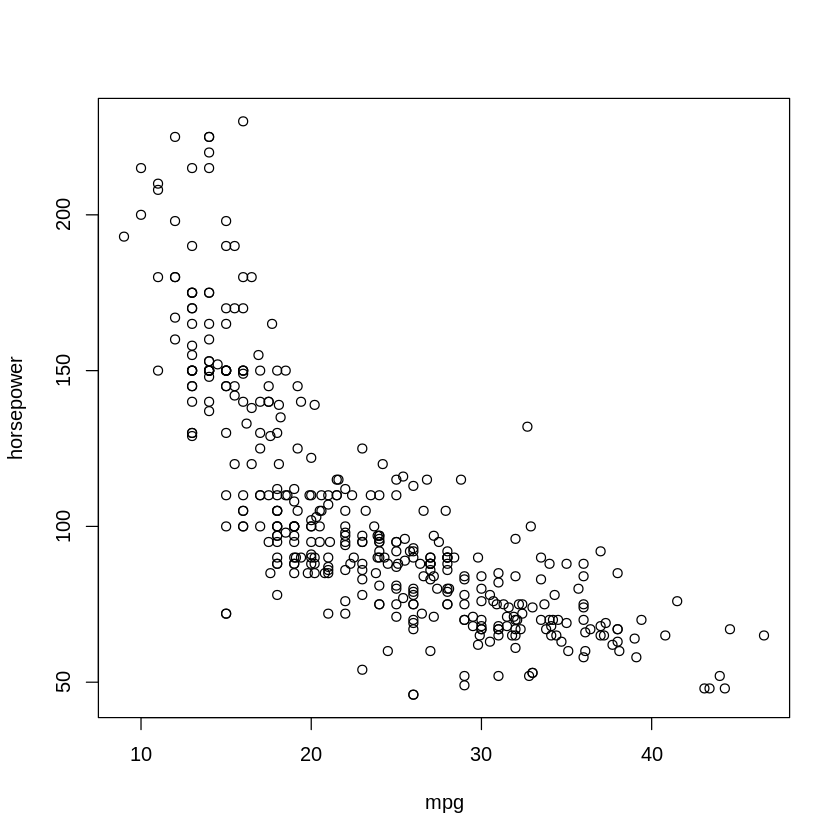

In [ ]:
#We're curious about the fit between mpg and horsepower.
attach(Auto)
plot(mpg,horsepower)

In [ ]:
#Performing the Linear Regression:
lm.fit=lm(mpg~horsepower, data=Auto, subset=train)
summary(lm.fit)


Call:
lm(formula = mpg ~ horsepower, data = Auto, subset = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.3177 -3.5428 -0.5591  2.3910 14.6836 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 41.283548   1.044352   39.53   <2e-16 ***
horsepower  -0.169659   0.009556  -17.75   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.032 on 194 degrees of freedom
Multiple R-squared:  0.619,	Adjusted R-squared:  0.6171 
F-statistic: 315.2 on 1 and 194 DF,  p-value: < 2.2e-16


In [ ]:
#Estimate the response for all 392 observations:
mean((mpg-predict(lm.fit,Auto))[-train]^2)

[1] 23.26601

In [ ]:
#Estimating test error for polynomial and cubic regressions:
lm.fit2=lm(mpg~poly(horsepower,2),data=Auto,subset=train)
mean((mpg-predict(lm.fit2,Auto))[-train]^2)

[1] 18.71646

In [ ]:
lm.fit3=lm(mpg~poly(horsepower,3),data=Auto,subset=train)
mean((mpg-predict(lm.fit3,Auto))[-train]^2)

[1] 18.79401

In [ ]:
#Trying a different seed, should get similar results but different errors:
set.seed(2)
train=sample(392,196)
lm.fit=lm(mpg~horsepower, data=Auto, subset=train)
mean((mpg-predict(lm.fit,Auto))[-train]^2)

[1] 25.72651

In [ ]:
lm.fit2=lm(mpg~poly(horsepower,2), data=Auto, subset=train)
mean((mpg-predict(lm.fit2,Auto))[-train]^2)

[1] 20.43036

In [ ]:
lm.fit3=lm(mpg~poly(horsepower,3),data=Auto,subset=train)
mean((mpg-predict(lm.fit3,Auto))[-train]^2)

[1] 20.38533

##Cross Validation Walkthrough

In [ ]:
#Comparing general vs specific
glm.fit=glm(mpg~horsepower, data=Auto)
lm.fit1=lm(mpg~horsepower,data=Auto)
coef(glm.fit)
coef(lm.fit1)

(Intercept)  horsepower 
 39.9358610  -0.1578447

(Intercept)  horsepower 
 39.9358610  -0.1578447

In [ ]:
#calling the boot library to use cv.glm
library(boot)

In [ ]:
#MSE Error...? LOOCV
cv.err=cv.glm(Auto, glm.fit)
cv.err$delta

[1] 24.23151 24.23114

In [ ]:
#More Complex Polynomial Fits. Initialize the vector then run a for loop:
cv.error=rep(0,5)
cv.error

[1] 0 0 0 0 0

In [ ]:
for (i in 1:5){
  glm.fit=glm(mpg~poly(horsepower,i), data=Auto)
  cv.error[i]=cv.glm(Auto,glm.fit)$delta[1]
}
cv.error

[1] 24.23151 19.24821 19.33498 19.42443 19.03321

Clearly, a linear fit (the first delta) isn't a good fit, the quadratic fit seems to do good here, but there's no real improvement in the cubic, quartic, etc.

##K-Fold Validation

In [ ]:
#Start with 10 bins: k=10, open the vector, apply the loop:
set.seed(17)
cv.error.10=rep(0,10) #eww...
for (i in 1:10) {
  glm.fit=glm(mpg~poly(horsepower,i), data=Auto)
  cv.error.10[i]=cv.glm(Auto, glm.fit,K=10)$delta[1]
}
cv.error.10 #I hate this list so much...

[1] 24.27207 19.26909 19.34805 19.29496 19.03198 18.89781 19.12061 19.14666
 [9] 18.87013 20.95520

Pretty good estimate for less time. Doing another for kicks.

In [ ]:
set.seed(17)
cv.error.15=rep(0,15) #...
for (i in 1:15){
  glm.fit=glm(mpg~poly(horsepower,i),data=Auto)
  cv.error.15[i]=cv.glm(Auto, glm.fit,K=15)$delta[1]
}
cv.error.15

[1] 24.24529 19.31913 19.38322 19.27524 18.84602 19.07625 18.71140 19.37070
 [9] 18.96544 19.74762 19.30097 19.35429 19.48036 39.17387 94.15101